In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)

## Melspec

In [4]:

training_set = train_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/melspec_split/train',
                                                 target_size = (64, 64),
                                                 shuffle=True)

test_set = test_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/melspec_split/val',
                                            target_size = (64, 64),
                                            shuffle=False)

Found 5517 images belonging to 6 classes.
Found 1169 images belonging to 6 classes.


In [ ]:
#VGG
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(64, 64, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
from keras.callbacks import History
history = History()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

In [ ]:
History = model.fit(training_set, validation_data = test_set, batch_size=64,epochs=15,callbacks=[history])

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

training_set_mfcc = train_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/mfcc_split/train',
                                                 target_size = (64, 64),
                                                 shuffle=True)

test_set_mfcc = test_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/mfcc_split/val',
                                            target_size = (64, 64),
                                            shuffle=False)

In [ ]:
target_names = []
for key in training_set.class_indices:
  target_names.append(key)

print(target_names)

In [ ]:
import sklearn
print(sklearn.__version__)

In [ ]:
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
accuracy = model.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(test_set)
y_pred = np.argmax(pred, axis=1)
#y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set.classes, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names ))

In [ ]:
accuracy = model.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])

Prediksi dengan data yang belum digunakan sama sekali

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set1 = test_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/melspec_split/test',
                                            target_size = (64, 64),
                                            shuffle=False)#berbeda dengan test_set diatas, diatas menggunakan validasi sedangkan ini menggunakan data dari folder test

In [ ]:
accuracy = model.evaluate(test_set1)
print('n', 'Test_Accuracy:-', accuracy[1])
pred1 = model.predict(test_set1)
y_pred1 = np.argmax(pred1, axis=1)
#y_true = np.argmax(pred1, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set1.classes, y_pred1))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set1.classes, y_pred1), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred1")
plt.ylabel("y_true")
plt.show()

In [ ]:
accuracy = model.evaluate(test_set1)
print('n', 'Test_Accuracy:-', accuracy[1])

## MFCC

In [ ]:
History1 = model.fit(training_set_mfcc, validation_data = test_set_mfcc, batch_size=64,epochs=15,callbacks=[history])

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(History1.history['accuracy'])

plt.plot(History1.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(History1.history['loss'])
plt.plot(History1.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
accuracy = model.evaluate(test_set_mfcc)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(test_set_mfcc)
y_pred = np.argmax(pred, axis=1)
#y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set_mfcc.classes, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set_mfcc.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
accuracy = model.evaluate(test_set_mfcc)
print('n', 'Test_Accuracy:-', accuracy[1])

Prediksi dengan data yang belum digunakan (test) bukan validation

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set2 = test_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/mfcc_split/test',
                                            target_size = (64, 64),
                                            shuffle=False)#menggunakan folder test dari mfcc

In [ ]:
accuracy = model.evaluate(test_set2)
print('n', 'Test_Accuracy:-', accuracy[1])
pred2 = model.predict(test_set2)
y_pred2 = np.argmax(pred2, axis=1)
#y_true = np.argmax(pred2, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set2.classes, y_pred2))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set2.classes, y_pred2), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred2")
plt.ylabel("y_true")
plt.show()

# RESNET

In [18]:
import tensorflow as tf
from keras.callbacks import History

# Function to create a residual block with shortcut adjustment
def residual_block(x, filters, use_shortcut=True):
    shortcut = x
    x = tf.keras.layers.Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2D(filters, (3, 3), padding='same')(x)
    
    if use_shortcut:
        # Adjust shortcut if the number of filters has changed
        if x.shape[-1] != shortcut.shape[-1]:
            shortcut = tf.keras.layers.Conv2D(filters, (1, 1), padding='same')(shortcut)
    
    x = tf.keras.layers.add([x, shortcut])  # Add shortcut connection
    x = tf.keras.layers.Activation('relu')(x)
    return x

# Build ResNet model_RESNETmelspec
def build_resnet(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(64, (7, 7), padding='same', activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    
    # Add residual blocks
    for _ in range(2):  # Repeat 2 times for each block
        x = residual_block(x, 64)
    
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    for _ in range(2):
        x = residual_block(x, 128)
    
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    for _ in range(2):
        x = residual_block(x, 256)
    
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    for _ in range(2):
        x = residual_block(x, 512)
    
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    
    model_RESNETmelspec = tf.keras.Model(inputs, outputs)
    return model_RESNETmelspec

# Instantiate and compile the model_RESNETmelspec
model_RESNETmelspec = build_resnet(input_shape=(64, 64, 3), num_classes=6)

history = History()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_RESNETmelspec.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_RESNETmelspec.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 64, 64,    │      9,472 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 32, 32,    │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 32, 32,    │     36,928 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 32, 32,    │     36,928 │ conv2d_21[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_8 (Add)         │ (None, 32, 32,    │          0 │ conv2d_22[0][0],  │
│                     │ 64)               │            │ max_pooling2d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 32, 32,    │          0 │ add_8[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 32, 32,    │     36,928 │ activation_8[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 32, 32,    │     36,928 │ conv2d_23[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_9 (Add)         │ (None, 32, 32,    │          0 │ conv2d_24[0][0],  │
│                     │ 64)               │            │ activation_8[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 32, 32,    │          0 │ add_9[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 16, 16,    │          0 │ activation_9[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 16, 16,    │     73,856 │ max_pooling2d_5[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 16, 16,    │    147,584 │ conv2d_25[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 16, 16,    │      8,320 │ max_pooling2d_5[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_10 (Add)        │ (None, 16, 16,    │          0 │ conv2d_26[0][0],  │
│                     │ 128)              │            │ conv2d_27[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 16, 16,    │          0 │ add_10[0][0]    

 Total params: 11,437,446 (43.63 MB)

 Trainable params: 11,437,446 (43.63 MB)

 Non-trainable params: 0 (0.00 B)

## MELSPEC

In [6]:
history_melspec = model_RESNETmelspec.fit(training_set, validation_data = test_set, batch_size=64,epochs=15,callbacks=[history])

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1732969273.846068    1389 service.cc:145] XLA service 0x78a224008a40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732969273.846138    1389 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732969273.846143    1389 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/173 ━━━━━━━━━━━━━━━━━━━━ 35:17 12s/step - accuracy: 0.3438 - loss: 1.7847

I0000 00:00:1732969279.597273    1389 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


173/173 ━━━━━━━━━━━━━━━━━━━━ 63s 297ms/step - accuracy: 0.4670 - loss: 1.3706 - val_accuracy: 0.7263 - val_loss: 0.7629
Epoch 2/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 46s 255ms/step - accuracy: 0.6843 - loss: 0.8172 - val_accuracy: 0.7049 - val_loss: 0.7647
Epoch 3/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 46s 255ms/step - accuracy: 0.7399 - loss: 0.6736 - val_accuracy: 0.7511 - val_loss: 0.7297
Epoch 4/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 46s 255ms/step - accuracy: 0.7897 - loss: 0.5608 - val_accuracy: 0.7665 - val_loss: 0.6466
Epoch 5/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 46s 257ms/step - accuracy: 0.8149 - loss: 0.5008 - val_accuracy: 0.8152 - val_loss: 0.5349
Epoch 6/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 47s 261ms/step - accuracy: 0.8285 - loss: 0.4677 - val_accuracy: 0.7990 - val_loss: 0.6128
Epoch 7/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 47s 260ms/step - accuracy: 0.8395 - loss: 0.4425 - val_accuracy: 0.8075 - val_loss: 0.5613
Epoch 8/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 47s 260ms/step - accuracy: 0.8668 - loss: 0.3824 - val

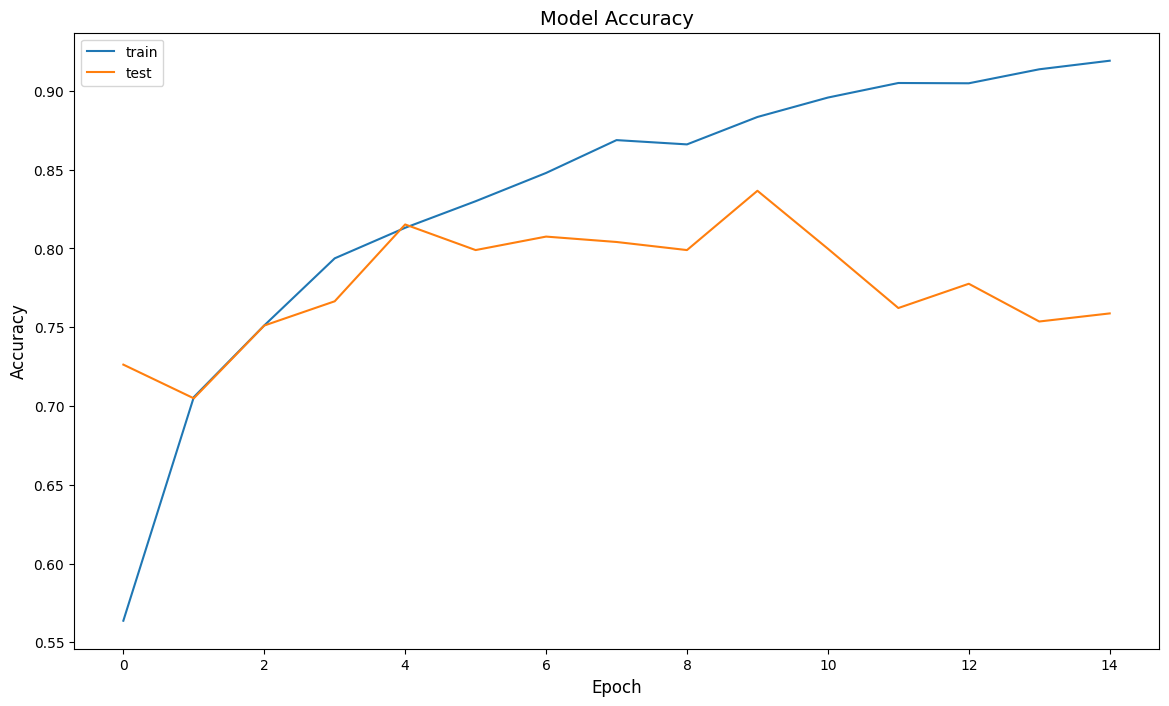

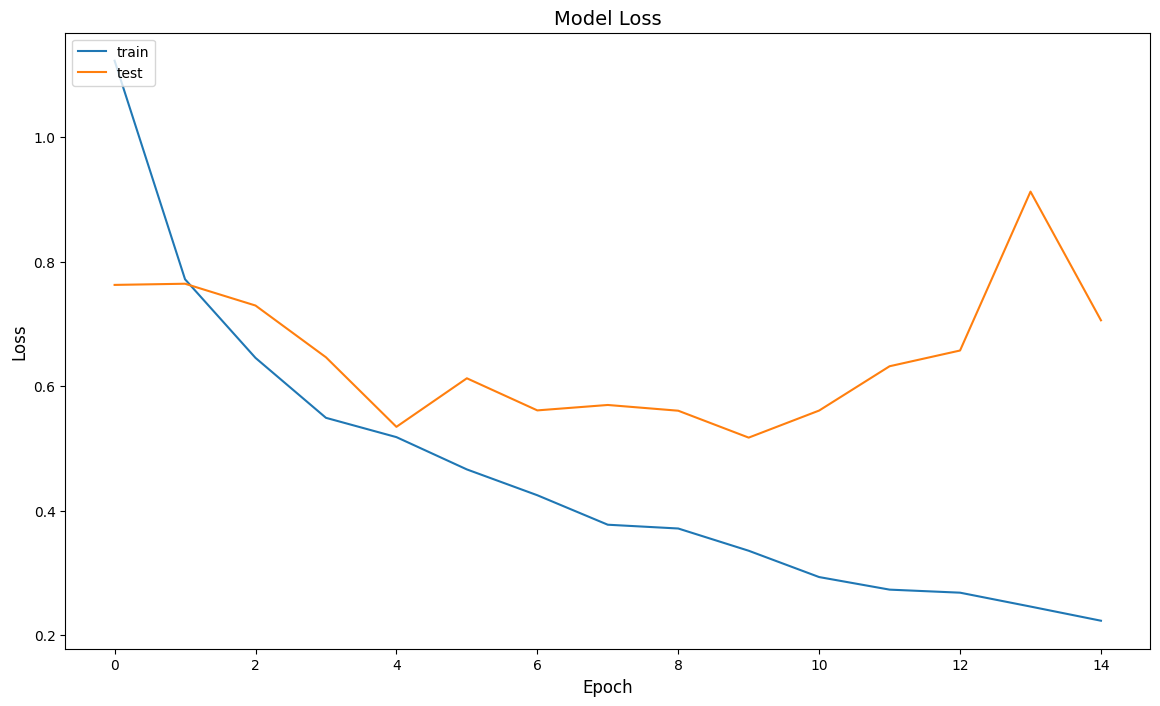

In [20]:
plt.figure(figsize=(14,8))
plt.plot(history_melspec.history['accuracy'])
plt.plot(history_melspec.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history_melspec.history['loss'])
plt.plot(history_melspec.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.0102 - loss: 1.7915
n Test_Accuracy:- 0.0932420864701271
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 199ms/step
confusion matrix
[[  0   0   0   0   0 222]
 [  0   1   0   0   0 197]
 [  0   0   0   0   0 290]
 [  0  45   0   0   0 232]
 [  0  18   0   0   0  56]
 [  0   0   0   0   0 108]]


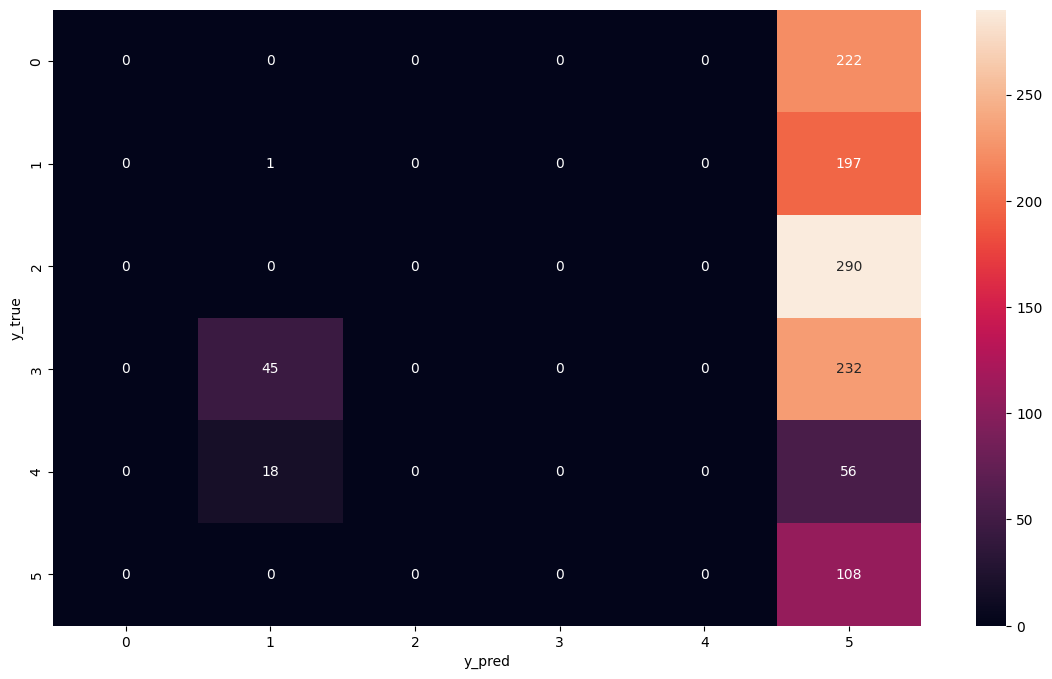

In [21]:
accuracy = model_RESNETmelspec.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model_RESNETmelspec.predict(test_set)
y_pred = np.argmax(pred, axis=1)

#y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set.classes, y_pred))

    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [22]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set1 = test_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/melspec_split/test',
                                            target_size = (64, 64),
                                            shuffle=False)#berbeda dengan test_set diatas, diatas menggunakan validasi sedangkan ini menggunakan data dari folder test

Found 1218 images belonging to 6 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 226ms/step - accuracy: 0.0110 - loss: 1.7967
n Test_Accuracy:- 0.0993431881070137
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step
confusion matrix
[[  0   0   0   0   0 256]
 [  0   0   0   0   0 123]
 [  0   1   0   0   0 381]
 [  0  76   0   0   0 170]
 [  0  19   0   0   0  71]
 [  0   0   0   0   0 121]]


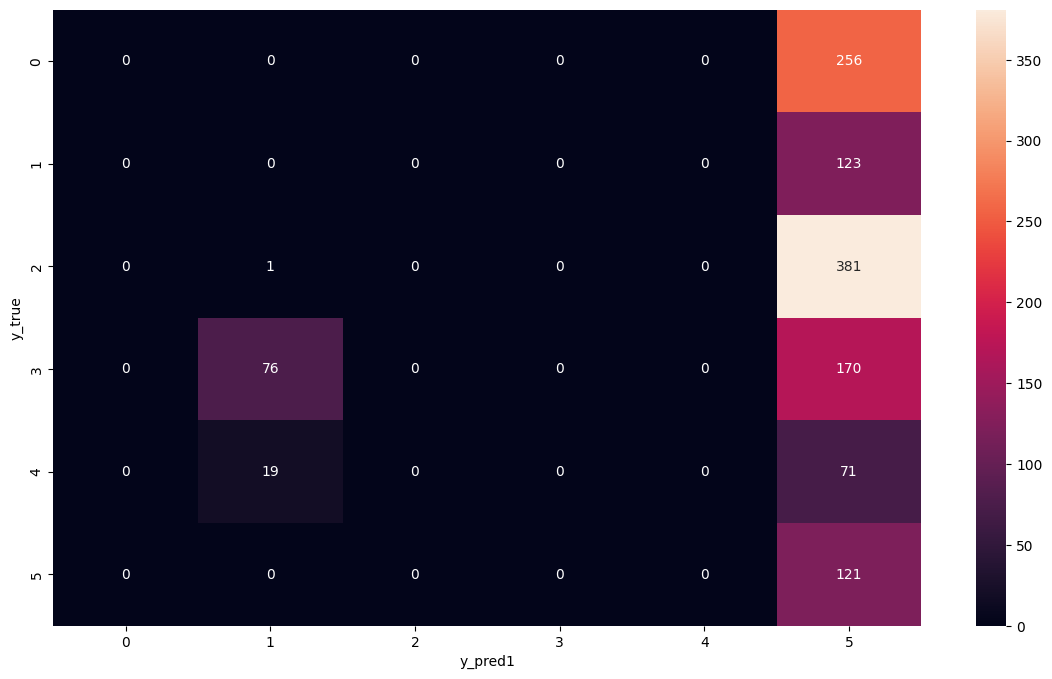

In [24]:
accuracy = model_RESNETmelspec.evaluate(test_set1)
print('n', 'Test_Accuracy:-', accuracy[1])
pred1 = model_RESNETmelspec.predict(test_set1)
y_pred1 = np.argmax(pred1, axis=1)
#y_true = np.argmax(pred1, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set1.classes, y_pred1))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set1.classes, y_pred1), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred1")
plt.ylabel("y_true")
plt.show()

Save model MELSPEC_RESNET

In [ ]:
import torch

# Assuming you have a model instance called 'model'
# and that you've trained it already

# Define the path where you want to save the model in Kaggle
model_save_path_melspec = '/kaggle/working/'

# Save the model's state_dict
torch.save(model.state_dict(), model_save_path_melspec)

print(f'Model saved to {model_save_path_melspec}')

## MFCC_RESNET

In [25]:

training_set_mfcc = train_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/mfcc_split/train',
                                                 target_size = (64, 64),
                                                 shuffle=True)

test_set_mfcc = test_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/mfcc_split/val',
                                            target_size = (64, 64),
                                            shuffle=False)

Found 5364 images belonging to 6 classes.
Found 1377 images belonging to 6 classes.


In [26]:
import tensorflow as tf
from keras.callbacks import History

# Function to create a residual block with shortcut adjustment
def residual_block(x, filters, use_shortcut=True):
    shortcut = x
    x = tf.keras.layers.Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2D(filters, (3, 3), padding='same')(x)
    
    if use_shortcut:
        # Adjust shortcut if the number of filters has changed
        if x.shape[-1] != shortcut.shape[-1]:
            shortcut = tf.keras.layers.Conv2D(filters, (1, 1), padding='same')(shortcut)
    
    x = tf.keras.layers.add([x, shortcut])  # Add shortcut connection
    x = tf.keras.layers.Activation('relu')(x)
    return x

# Build ResNet model
def build_resnet(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(64, (7, 7), padding='same', activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    
    # Add residual blocks
    for _ in range(2):  # Repeat 2 times for each block
        x = residual_block(x, 64)
    
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    for _ in range(2):
        x = residual_block(x, 128)
    
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    for _ in range(2):
        x = residual_block(x, 256)
    
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
    
    for _ in range(2):
        x = residual_block(x, 512)
    
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs, outputs)
    return model

# Instantiate and compile the model
model_mfccRESNET = build_resnet(input_shape=(64, 64, 3), num_classes=6)

history = History()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model_mfccRESNET.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_mfccRESNET.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 64, 64,    │      9,472 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 32, 32,    │          0 │ conv2d_40[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 32, 32,    │     36,928 │ max_pooling2d_8[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 32, 32,    │     36,928 │ conv2d_41[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_16 (Add)        │ (None, 32, 32,    │          0 │ conv2d_42[0][0],  │
│                     │ 64)               │            │ max_pooling2d_8[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_16       │ (None, 32, 32,    │          0 │ add_16[0][0]      │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_43 (Conv2D)  │ (None, 32, 32,    │     36,928 │ activation_16[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_44 (Conv2D)  │ (None, 32, 32,    │     36,928 │ conv2d_43[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_17 (Add)        │ (None, 32, 32,    │          0 │ conv2d_44[0][0],  │
│                     │ 64)               │            │ activation_16[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_17       │ (None, 32, 32,    │          0 │ add_17[0][0]      │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 16, 16,    │          0 │ activation_17[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_45 (Conv2D)  │ (None, 16, 16,    │     73,856 │ max_pooling2d_9[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_46 (Conv2D)  │ (None, 16, 16,    │    147,584 │ conv2d_45[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 16, 16,    │      8,320 │ max_pooling2d_9[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_18 (Add)        │ (None, 16, 16,    │          0 │ conv2d_46[0][0],  │
│                     │ 128)              │            │ conv2d_47[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_18       │ (None, 16, 16,    │          0 │ add_18[0][0]    

 Total params: 11,437,446 (43.63 MB)

 Trainable params: 11,437,446 (43.63 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
History_mfcc = model_mfccRESNET.fit(training_set_mfcc, validation_data = test_set_mfcc, batch_size=32,epochs=25,callbacks=[history])

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


168/168 ━━━━━━━━━━━━━━━━━━━━ 97s 521ms/step - accuracy: 0.2658 - loss: 2.9496 - val_accuracy: 0.3479 - val_loss: 1.7071
Epoch 2/25
168/168 ━━━━━━━━━━━━━━━━━━━━ 45s 257ms/step - accuracy: 0.3214 - loss: 1.6535 - val_accuracy: 0.3762 - val_loss: 1.5936
Epoch 3/25
168/168 ━━━━━━━━━━━━━━━━━━━━ 46s 262ms/step - accuracy: 0.3882 - loss: 1.5432 - val_accuracy: 0.3682 - val_loss: 1.6115
Epoch 4/25
168/168 ━━━━━━━━━━━━━━━━━━━━ 46s 263ms/step - accuracy: 0.3929 - loss: 1.5318 - val_accuracy: 0.3776 - val_loss: 1.5643
Epoch 5/25
168/168 ━━━━━━━━━━━━━━━━━━━━ 45s 261ms/step - accuracy: 0.3767 - loss: 1.5144 - val_accuracy: 0.3755 - val_loss: 1.5796
Epoch 6/25
168/168 ━━━━━━━━━━━━━━━━━━━━ 45s 257ms/step - accuracy: 0.3991 - loss: 1.5039 - val_accuracy: 0.3660 - val_loss: 1.5183
Epoch 7/25
168/168 ━━━━━━━━━━━━━━━━━━━━ 44s 255ms/step - accuracy: 0.3897 - loss: 1.5060 - val_accuracy: 0.3747 - val_loss: 1.6932
Epoch 8/25
168/168 ━━━━━━━━━━━━━━━━━━━━ 45s 256ms/step - accuracy: 0.4031 - loss: 1.4869 - val

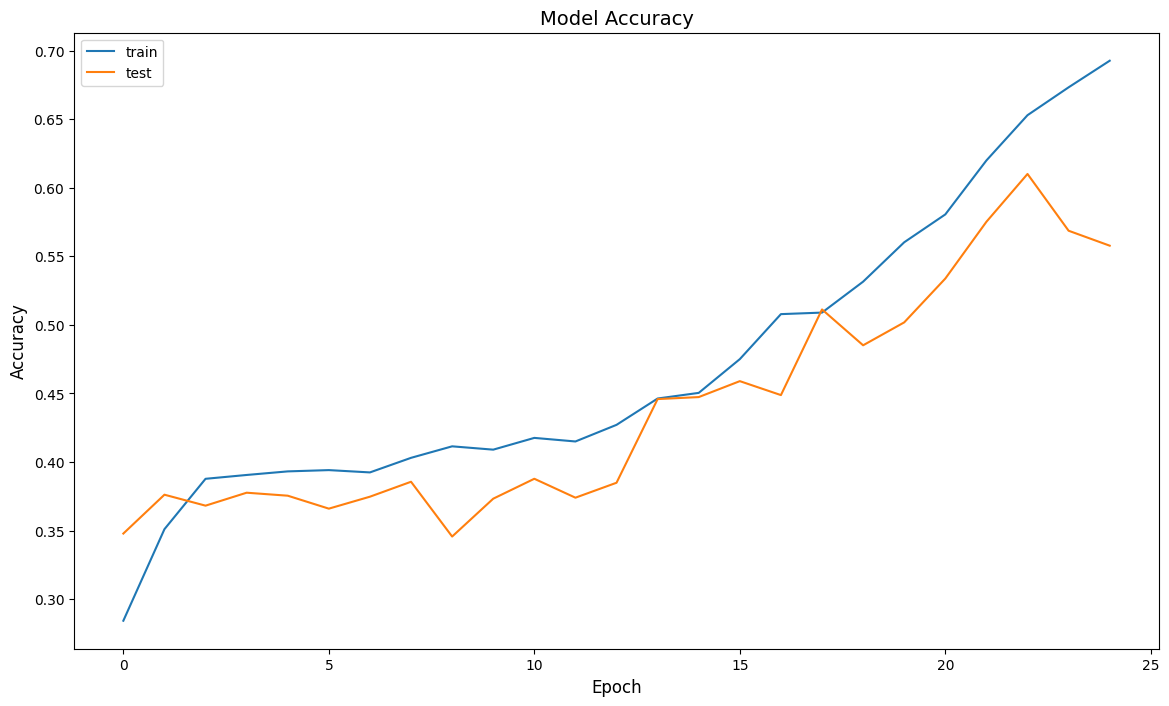

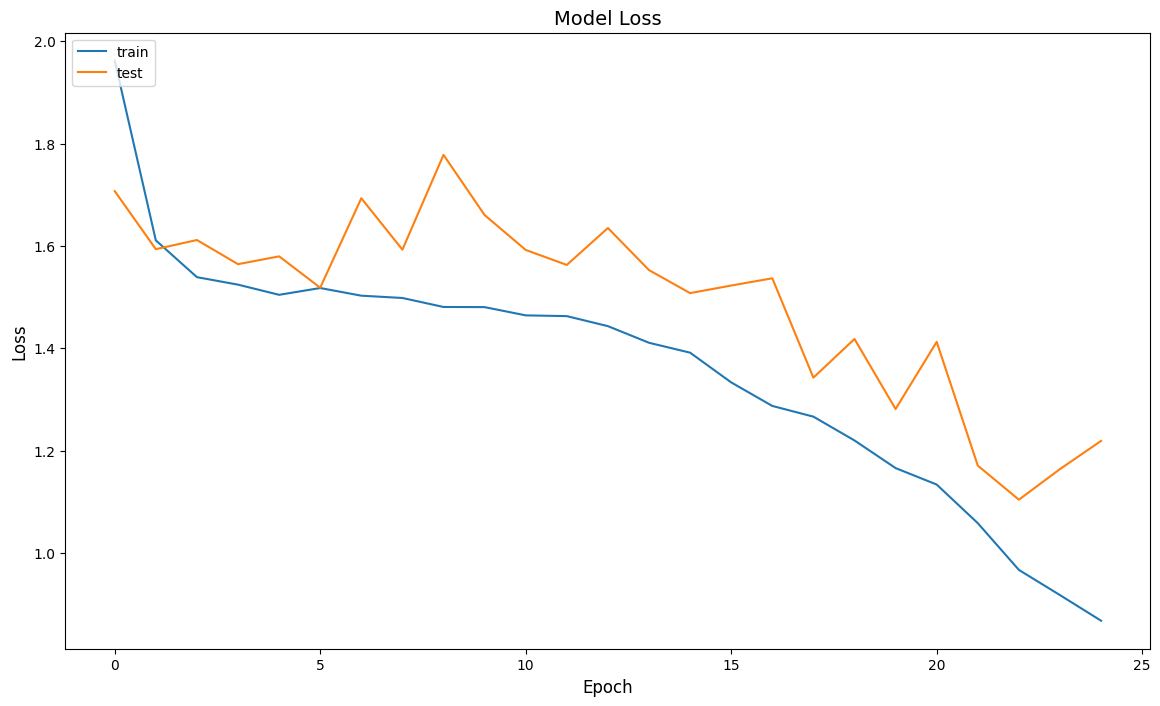

In [28]:
plt.figure(figsize=(14,8))
plt.plot(History_mfcc.history['accuracy'])
plt.plot(History_mfcc.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(History_mfcc.history['loss'])
plt.plot(History_mfcc.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - accuracy: 0.5684 - loss: 1.1650
n Test_Accuracy:- 0.5577341914176941
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 188ms/step
confusion matrix
[[128  17  20  37   0  16]
 [  4  63  22  48   2  38]
 [  5   4 307 133   0  30]
 [  0   1   3 186   0   0]
 [  0   3   1 171   0   6]
 [  0  15  17  16   0  84]]


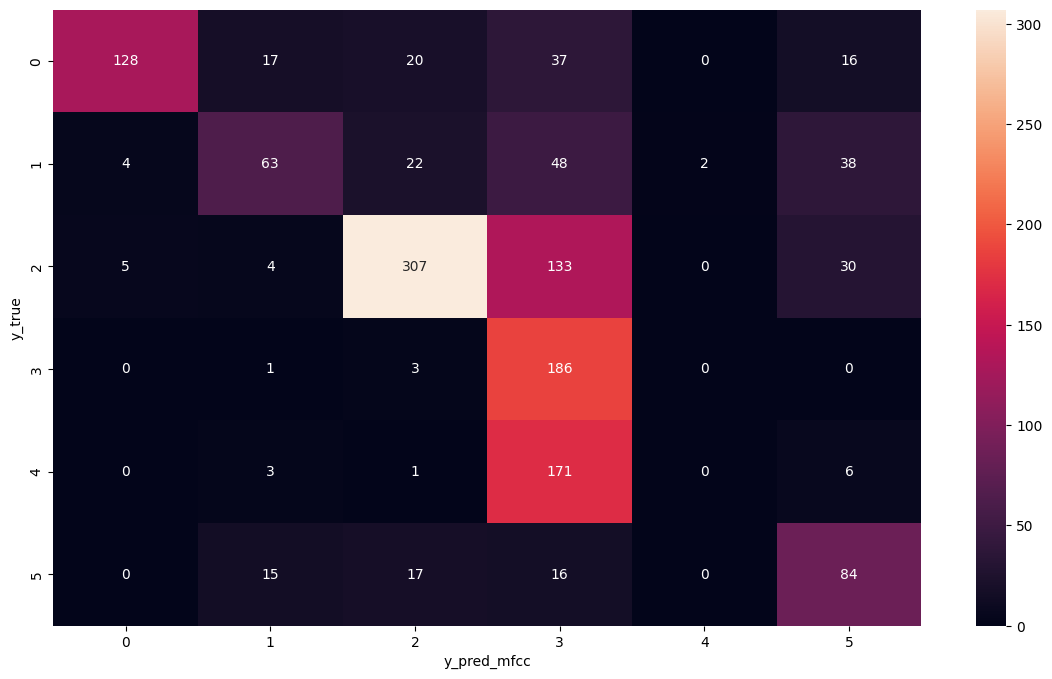

In [29]:
accuracy = model_mfccRESNET.evaluate(test_set_mfcc)
print('n', 'Test_Accuracy:-', accuracy[1])
pred2 = model_mfccRESNET.predict(test_set_mfcc)
y_pred_mfcc = np.argmax(pred2, axis=1)
#y_true = np.argmax(pred2, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set_mfcc.classes, y_pred_mfcc))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set_mfcc.classes, y_pred_mfcc), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred_mfcc")
plt.ylabel("y_true")
plt.show()

In [30]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set2 = test_datagen.flow_from_directory('/kaggle/input/dl-20242025-itera-west-indonesia-birds-dataset/split_data/mfcc_split/test',
                                            target_size = (64, 64),
                                            shuffle=False)#berbeda dengan test_set diatas, diatas menggunakan validasi sedangkan ini menggunakan data dari folder test

Found 1163 images belonging to 6 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 434ms/step - accuracy: 0.6148 - loss: 1.1619
n Test_Accuracy:- 0.6414445638656616
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step
confusion matrix
[[ 92   8  14  54   0   4]
 [  5  96  15  51   1  14]
 [  3   7 143  49   0  26]
 [  0   0   8 361   0  12]
 [  0   6   7  82   0   5]
 [  1   2  13  30   0  54]]


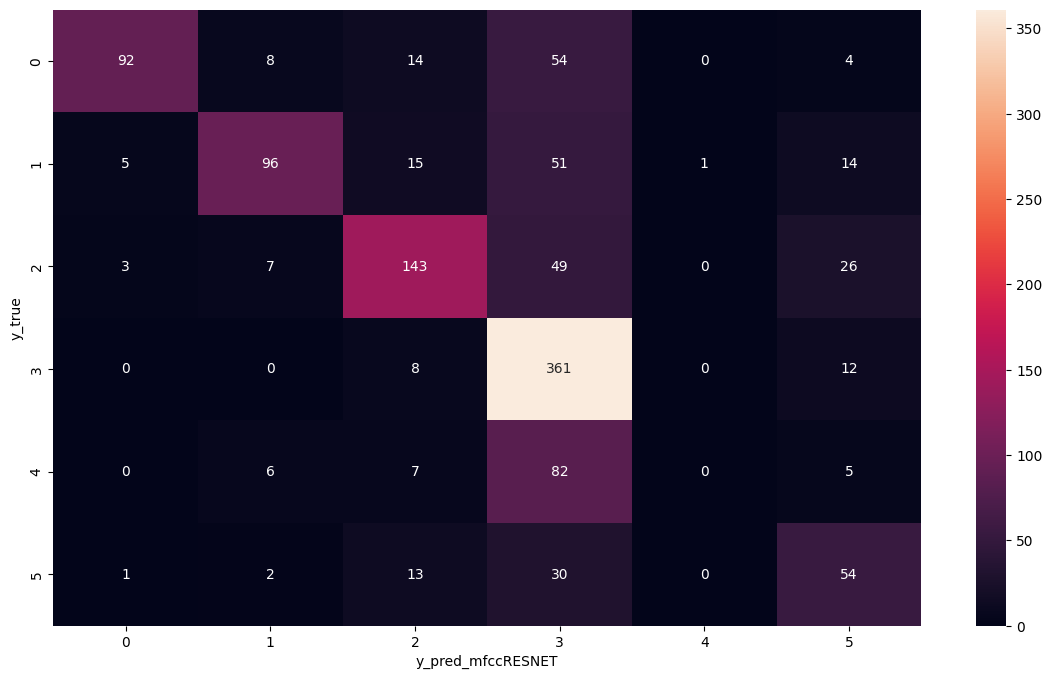

In [31]:
accuracy = model_mfccRESNET.evaluate(test_set2)
print('n', 'Test_Accuracy:-', accuracy[1])
pred1 = model_mfccRESNET.predict(test_set2)
y_pred_mfccRESNET = np.argmax(pred1, axis=1)
#y_true = np.argmax(pred1, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set2.classes, y_pred_mfccRESNET))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set2.classes, y_pred_mfccRESNET), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred_mfccRESNET")
plt.ylabel("y_true")
plt.show()

Save MFCC RESNET MODEL

In [32]:
# Save the model
model_save_path = '/kaggle/working/model_mfccRESNET1.h5'  # Change this path as needed
model_mfccRESNET.save(model_save_path)

print(f'Model saved to {model_save_path}')

Model saved to /kaggle/working/model_mfccRESNET1.h5


In [33]:
%cd /kaggle/working
from IPython.display import FileLink
FileLink('/kaggle/working/model_mfccRESNET1.h5')

/kaggle/working


/kaggle/working/model_mfccRESNET1.h5

In [34]:
from IPython.display import FileLink
FileLink(r'/kaggle/working/model_mfccRESNET1.h5')

/kaggle/working/model_mfccRESNET1.h5

# Coba dengan data suara lain

In [ ]:
import tensorflow as tf
import numpy as np
import librosa

# Load the model
model_save_path = '/kaggle/working/model_mfccRESNET1.h5'  # Path where the model is saved
loaded_model = tf.keras.models.load_model(model_save_path)

# Function to extract MFCC features from an audio file
def extract_mfcc(file_path, sr=22050, n_mfcc=64, n_fft=2048, hop_length=512):
    # Load the audio file
    y, _ = librosa.load(file_path, sr=sr)
    
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    
    # Transpose to get shape (n_mfcc, time)
    mfccs = mfccs.T  # Shape: (time, n_mfcc)
    
    # Ensure the shape is (64, n_mfcc) for model input
    if mfccs.shape[0] < 64:
        mfccs = np.pad(mfccs, ((0, 64 - mfccs.shape[0]), (0, 0)), mode='constant')
    else:
        mfccs = mfccs[:64, :]
    
    # Duplicate the single-channel MFCCs to create a 3-channel input
    mfccs = np.stack([mfccs] * 3, axis=-1)  # Shape: (64, 64, 3)
    
    return mfccs

# Function to classify an audio file
def classify_audio(file_path):
    # Extract features
    features = extract_mfcc(file_path)
    
    # Add batch dimension
    features = np.expand_dims(features, axis=0)  # Shape: (1, 64, 64, 3)
    
    # Make predictions
    predictions = loaded_model.predict(features)
    
    # Get the predicted class
    predicted_class = np.argmax(predictions, axis=1)
    
    return predicted_class

# Example usage
audio_file_path = '/kaggle/input/anthipes-solitaris/XC490588 - Sikatan kerongkongan-putih - Anthipes solitaris.mp3'
#data yang digunakan memiliki kelas aktual 5
predicted_class = classify_audio(audio_file_path)

print(f'Predicted class: {predicted_class[0]}')